<a href="https://colab.research.google.com/github/rafiddeshmukh/Netflix_Movies_and_TV_Shows_Clustering/blob/main/Netflix_Movies_and_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Netflix Movies and TV Shows Clustering**



##### **Project Type**    - **Unsupervised**
##### **Contribution**    - **Rafid Deshmukh (Individual)**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

[Netflix Movies and TV Shows Clustering](https://github.com/rafiddeshmukh/Netflix_Movies_and_TV_Shows_Clustering)

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

     The additional credits will have advantages over other students during Star Student selection.

             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.


```
# Chart visualization code
```


*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
import plotly.offline as po

import scipy.stats as stats
from scipy.stats import chi2_contingency
from wordcloud import WordCloud

from wordcloud import WordCloud, STOPWORDS

# Importing warnings library
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load Dataset
nf_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Almabeter/4.ML/4.Unsupervised Algorithms /Project/Unsupervised-Netflix_clustering/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

### Dataset First View

In [5]:
# Dataset First Look
nf_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [6]:
nf_df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
nf_df.shape

(7787, 12)

### Dataset Information

In [8]:
# Dataset Info
nf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
# Check for duplicate rows
num_duplicates = nf_df.duplicated().sum()

print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
# Check for null values
null_values = nf_df.isnull().sum()
print(null_values)

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


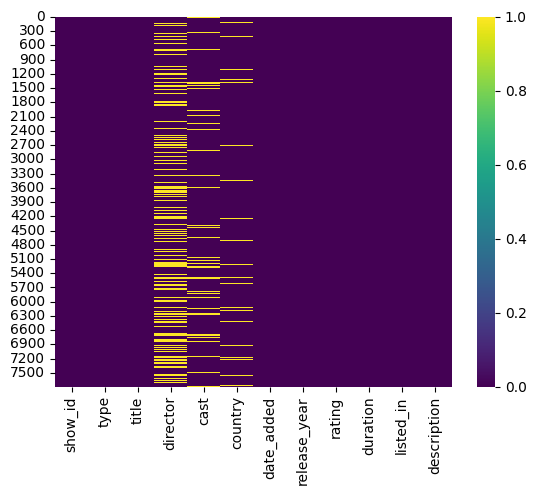

In [11]:
# Visualizing the missing values
sns.heatmap(nf_df.isnull(), cmap='viridis')
plt.show()

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
nf_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [13]:
# Dataset Describe
nf_df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,7787,7787,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,7787,2,Movie,5377,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,7787,7787,3%,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,5398,4049,"Raúl Campos, Jan Suter",18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7069,6831,David Attenborough,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7280,681,United States,2555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,7777,1565,"January 1, 2020",118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,7787.0,NaN,NaN,NaN,2013.93258,8.757395,1925.0,2013.0,2017.0,2018.0,2021.0
rating,7780,14,TV-MA,2863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,7787,216,1 Season,1608,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Variables Description

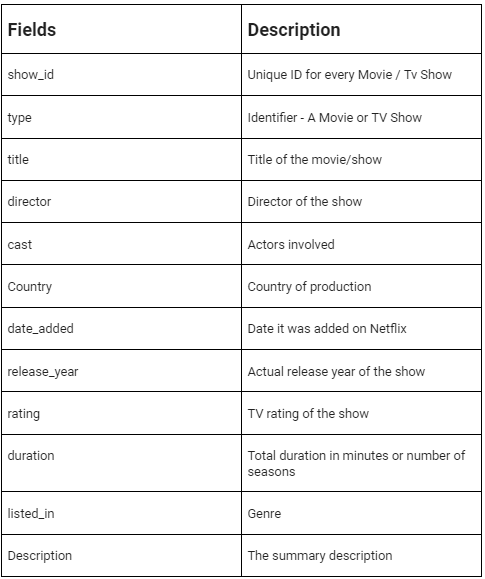

### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
# Check for unique values in each column
unique_values = nf_df.nunique().sort_values(ascending=False)
print(unique_values)

show_id         7787
title           7787
description     7769
cast            6831
director        4049
date_added      1565
country          681
listed_in        492
duration         216
release_year      73
rating            14
type               2
dtype: int64


## 3. ***Data Wrangling***

### Data Wrangling Code

##Handling Missing value
****

In [15]:
# Assuming 'nf_df' is the DataFrame containing the Netflix dataset

# Fill missing values in 'director' column with 'Unknown'
nf_df['director'] = nf_df['director'].fillna('Unknown')

# Fill missing values in 'cast' column with 'Unknown'
nf_df['cast'] = nf_df['cast'].fillna('Unknown')

# Fill missing values in 'country' column with 'Unknown'
nf_df['country'] = nf_df['country'].fillna('Unknown')

# Fill missing values in 'rating' column with 'mode'
nf_df['rating'] = nf_df['rating'].fillna(nf_df['rating'].mode()[0])

nf_df.dropna(axis=0, inplace = True)

# Verify that there are no more missing values
null_values = nf_df.isnull().sum()
print(null_values)

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


###3.1Country, listed_in:
----------------------

In [16]:
# Write your code to make your dataset analysis ready.
# Top countries
nf_df.country.value_counts()




United States                                                   2549
India                                                            923
Unknown                                                          506
United Kingdom                                                   396
Japan                                                            225
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 682, dtype: int64

In [17]:
# Genre of shows
nf_df.listed_in.value_counts()

Documentaries                                                                      334
Stand-Up Comedy                                                                    321
Dramas, International Movies                                                       320
Comedies, Dramas, International Movies                                             243
Dramas, Independent Movies, International Movies                                   215
                                                                                  ... 
Anime Series, Crime TV Shows, TV Thrillers                                           1
Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows                         1
Crime TV Shows, International TV Shows, Reality TV                                   1
International Movies, Romantic Movies, Sci-Fi & Fantasy                              1
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows      1
Name: listed_in, Length: 491, dtype: int64

*  There are some movies / TV shows that were filmed in multiple countries, have multiple genres associated with it.
*  To simplify the analysis, let's consider only the primary country where that respective movie / TV show was filmed.
*  Also, let's consider only the primary genre of the respective movie / TV show.

In [18]:
# Choosing the primary country and primary genre to simplify the analysis
nf_df['country'] = nf_df['country'].apply(lambda x: x.split(',')[0])
nf_df['listed_in'] = nf_df['listed_in'].apply(lambda x: x.split(',')[0])

###3.2 Typecasting 'duration' from string to integer
-----------------------------

In [19]:
# Splitting the duration column, and changing the datatype to integer
nf_df['duration'] = nf_df['duration'].apply(lambda x: int(x.split()[0]))

In [20]:
# Number of seasons for tv shows
nf_df[nf_df['type']=='TV Show'].duration.value_counts()

1     1608
2      378
3      183
4       86
5       57
6       30
7       19
8       18
9        8
10       5
11       2
12       2
15       2
13       1
16       1
Name: duration, dtype: int64

In [21]:
# Movie length in minutes
nf_df[nf_df['type']=='Movie'].duration.unique()

array([ 93,  78,  80, 123,  95, 119, 118, 143, 103,  89,  91, 149, 144,
       124,  87, 110, 128, 117, 100,  84,  99,  90, 102, 104, 105,  56,
       125,  81,  97, 106, 107, 109,  44,  75, 101,  37, 113, 114, 130,
        94, 140, 135,  82,  70, 121,  92, 164,  53,  83, 116,  86, 120,
        96, 126, 129,  77, 137, 148,  28, 122, 176,  85,  22,  68, 111,
        29, 142, 168,  21,  59,  20,  98, 108,  76,  26, 156,  30,  57,
       150, 133, 115, 154, 127, 146, 136,  88, 131,  24, 112,  74,  63,
        38,  25, 174,  60, 153, 158, 151, 162,  54,  51,  69,  64, 147,
        42,  79,  40,  45, 172,  10, 163,  55,  72,  61,  71, 160, 171,
        48, 139, 157,  15,  65, 134, 161,  62, 186,  49,  73,  58, 165,
       166, 138, 159, 141, 132,  52,  67,  34,  66, 312, 180,  47, 155,
        14, 177,  11,   9,  46, 145,   8,  12,  43,  50,  23, 185, 200,
       169,  27, 170, 196,  33, 181, 204,  32,  35, 167, 179, 193,  13,
       214,  17, 173, 192, 209, 187,  41, 182, 224, 233, 189, 15

We have successfully converted the datatype of duration column to int.

###3.3 Typecasting 'date_added' from string to datetime:
----------------------

In [22]:
# Typecasting 'date_added' from string to datetime
nf_df["date_added"] = pd.to_datetime(nf_df['date_added'])

In [23]:
# first and last date on which a show was added on Netflix
nf_df.date_added.min(),nf_df.date_added.max()

(Timestamp('2008-01-01 00:00:00'), Timestamp('2021-01-16 00:00:00'))

The shows were added on Netflix between 1st January 2008 and 16th January 2021.

In [24]:
# Adding new attributes month and year of date added

nf_df['month_added'] = nf_df['date_added'].dt.month
nf_df['year_added'] = nf_df['date_added'].dt.year
nf_df.drop('date_added', axis=1, inplace=True)

In [25]:
nf_df['month_added']

0        8
1       12
2       12
3       11
4        1
        ..
7782    10
7783     3
7784     9
7785    10
7786     3
Name: month_added, Length: 7777, dtype: int64

###3.4 Rating
*****

The ratings can be changed to age restrictions that apply on certain movies and TV shows.

[Reference](https://www.primevideo.com/help/ref=atv_hp_nd_cnt?nodeId=GFGQU3WYEG6FSJFJ)

<Axes: xlabel='rating', ylabel='count'>

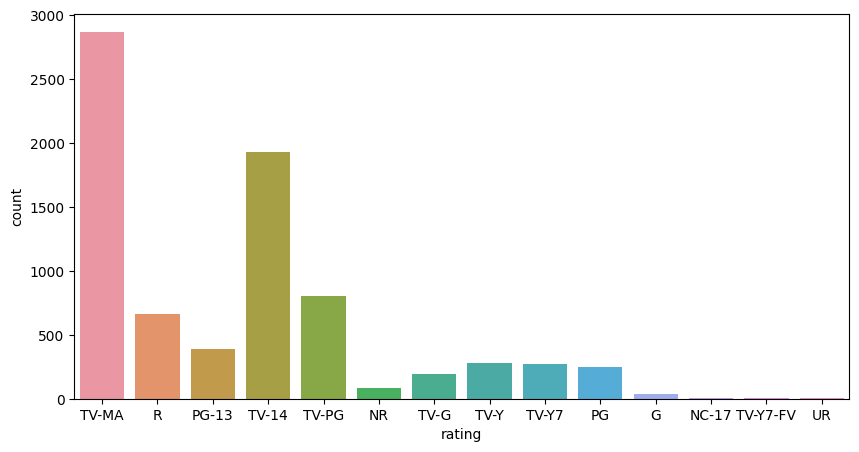

In [26]:
# Age ratings for shows in the dataset
plt.figure(figsize=(10,5))
sns.countplot(x='rating',data=nf_df)

Highest number of shows on Netflix are rated by TV-MA, followed by TV-14 and TV-PG

In [27]:
# Age ratings
nf_df.rating.unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [28]:
# Changing the values in the rating column
rating_map = {'TV-MA':'Adults',
              'R':'Adults',
              'PG-13':'Teens',
              'TV-14':'Young Adults',
              'TV-PG':'Older Kids',
              'NR':'Adults',
              'TV-G':'Kids',
              'TV-Y':'Kids',
              'TV-Y7':'Older Kids',
              'PG':'Older Kids',
              'G':'Kids',
              'NC-17':'Adults',
              'TV-Y7-FV':'Older Kids',
              'UR':'Adults'}

In [29]:
nf_df['rating'].replace(rating_map, inplace = True)
nf_df['rating'].unique()

array(['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids'],
      dtype=object)

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 (Content Type Distribution)

Text(0.5, 1.0, 'Movies and TV Shows in the dataset')

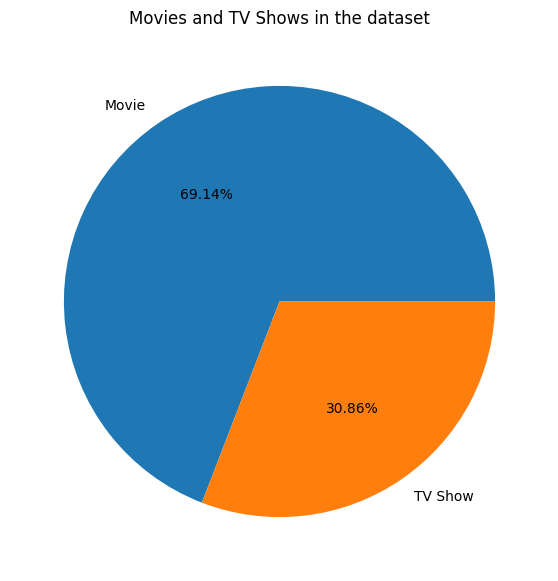

In [30]:
# Chart - 1 visualization code
# Number of Movies and TV Shows in the dataset
plt.figure(figsize=(7,7))
nf_df.type.value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.ylabel('')
plt.title('Movies and TV Shows in the dataset')


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2 (Top 10 Directors by Number of Titles)

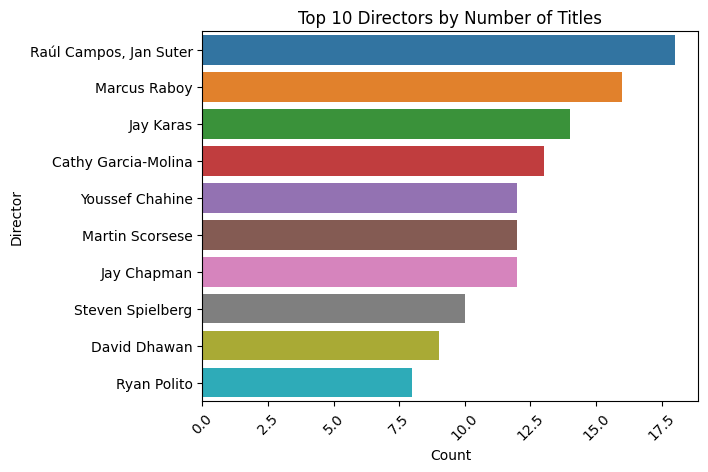

In [31]:
# Chart - 2 visualization code

# Count the number of titles for each director and select the top 10
top_directors = nf_df[~(nf_df['director']=='Unknown')].director.value_counts().head(10)

# Create a bar chart
sns.barplot(y=top_directors.index, x=top_directors.values)
plt.xlabel('Count')
plt.ylabel('Director')
plt.title('Top 10 Directors by Number of Titles')
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3 (Top 10 Countries by Number of Titles)

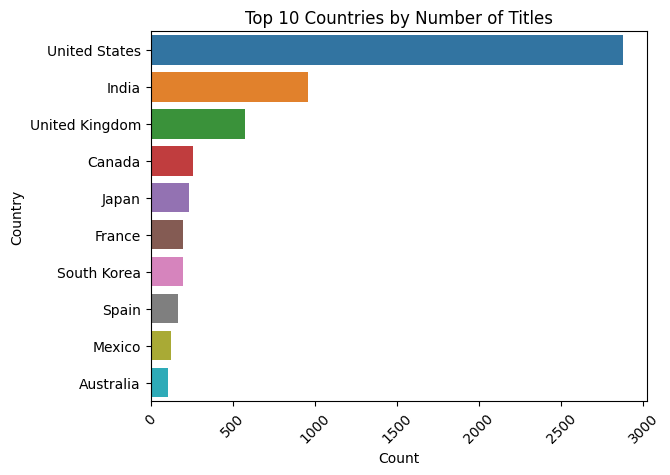

In [32]:
# Chart - 3 visualization code
# Count the number of titles for each country and select the top 10
top_countries = nf_df[~(nf_df['country']=='Unknown')].country.value_counts().head(10)

# Create a bar chart
sns.barplot(y=top_countries.index, x=top_countries.values)
plt.xlabel('Count')
plt.ylabel('Country')
plt.title('Top 10 Countries by Number of Titles')
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4 (Number of shows on Netflix for different age groups)

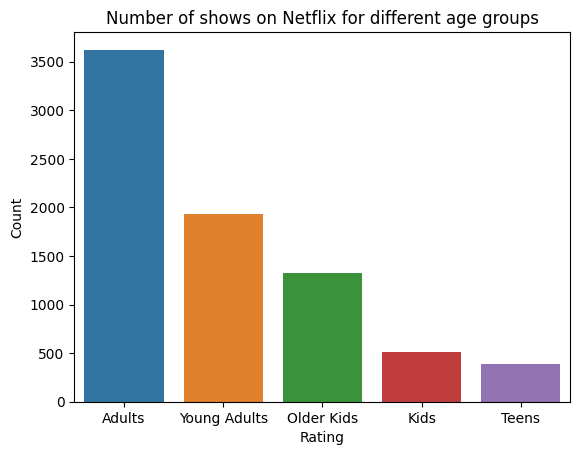

In [33]:
# Chart - 4 visualization code
# Count the number of titles for each rating
ratings = nf_df['rating'].value_counts()

# Create a bar chart
sns.barplot(x=ratings.index, y=ratings.values)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Number of shows on Netflix for different age groups')
#plt.xticks(rotation=45)
plt.show()



##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5 (Genre Distribution)

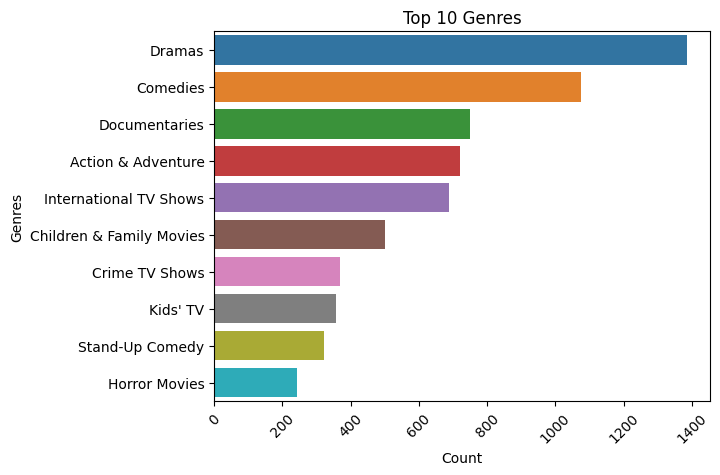

In [34]:
# Chart - f visualization code
# Top 10 genres
genres = nf_df['listed_in'].str.split(',').explode().str.strip().value_counts().nlargest(10)

# Create a bar chart
sns.barplot(y=genres.index, x=genres.values)
plt.xlabel('Count')
plt.ylabel('Genres')
plt.title('Top 10 Genres')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6 (Content Release Over Time)

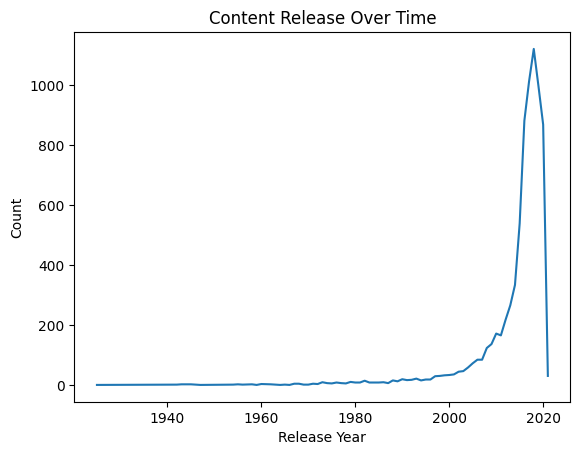

In [35]:
# Chart - 6 visualization code
# Count the number of titles released in each year and sort them
release_years = nf_df['release_year'].value_counts().sort_index()

# Create a line chart
sns.lineplot(x=release_years.index, y=release_years.values)
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Content Release Over Time')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7 (Top 10 Actors with Most Appearances)

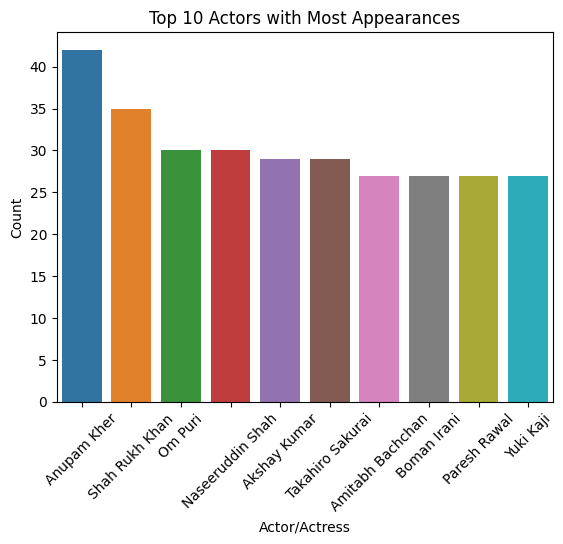

In [36]:
# Chart - 7 visualization code
# Split the cast members and count the appearances of each actor/actress
actors = nf_df[~(nf_df['cast']=='Unknown')].cast.str.split(',').explode().str.strip()
top_actors = actors.value_counts().head(10)

# Create a bar chart
sns.barplot(x=top_actors.index, y=top_actors.values)
plt.xlabel('Actor/Actress')
plt.ylabel('Count')
plt.title('Top 10 Actors with Most Appearances')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8 (Top 10 Countries with Most TV Shows)

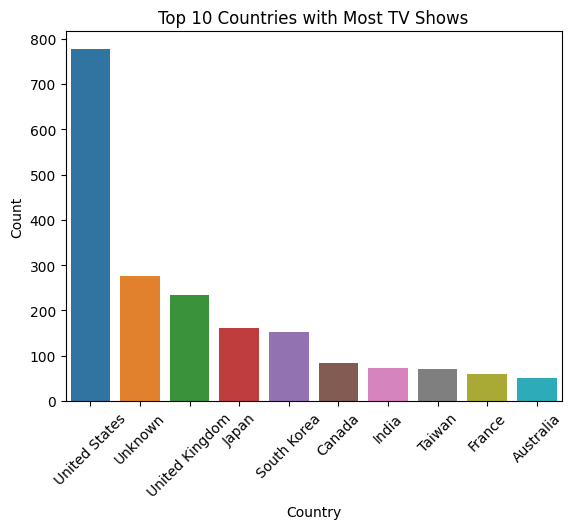

In [37]:
# Chart - 8 visualization code
# Count the number of TV shows for each country and select the top 10
tv_shows_by_country = nf_df[nf_df['type'] == 'TV Show']['country'].value_counts().head(10)

# Create a bar chart
sns.barplot(x=tv_shows_by_country.index, y=tv_shows_by_country.values)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top 10 Countries with Most TV Shows')
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9 (Number of movies and TV shows added over the years)




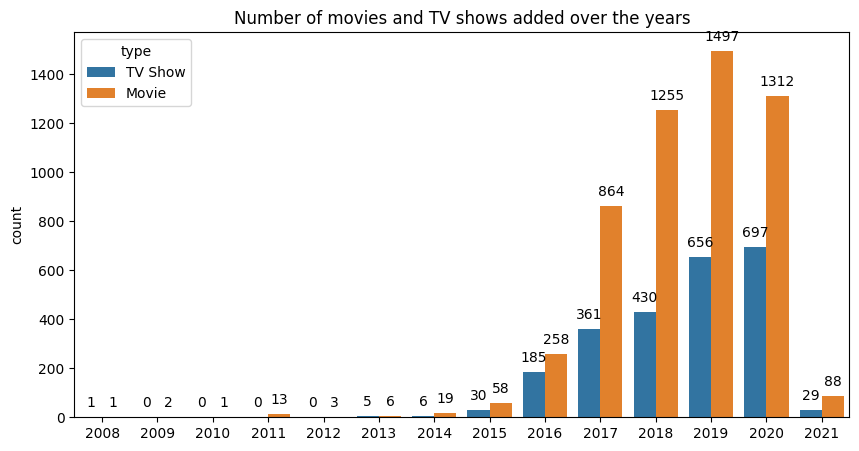

In [38]:
# Number of shows added over the years
# Number of movies and TV shows added over the years
plt.figure(figsize=(10,5))
p = sns.countplot(x='year_added',data=nf_df, hue='type')
plt.title('Number of movies and TV shows added over the years')
plt.xlabel('')
for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10 (Seasons in each TV show & length of movie)

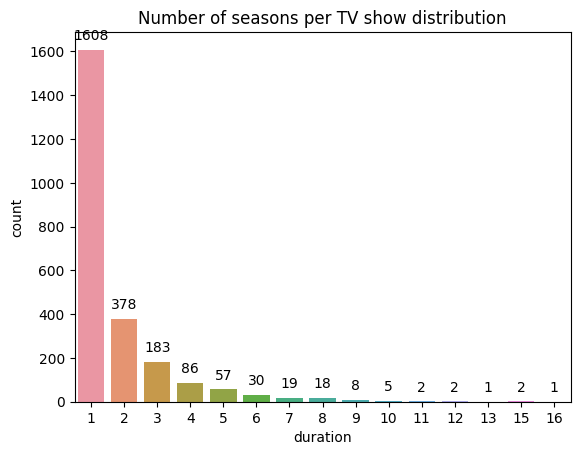

In [39]:
# Chart - 10 visualization code
# Seasons in each TV show

p = sns.countplot(x='duration',data=nf_df[nf_df['type']=='TV Show'])
plt.title('Number of seasons per TV show distribution')

for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


In [40]:
# % of tv shows with just 1 season
len(nf_df[(nf_df['type']=='TV Show') & (nf_df['duration']==1)]) / len(nf_df[nf_df['type']=='TV Show'])* 100

67.0

Text(0.5, 1.0, 'Movie duration distribution')

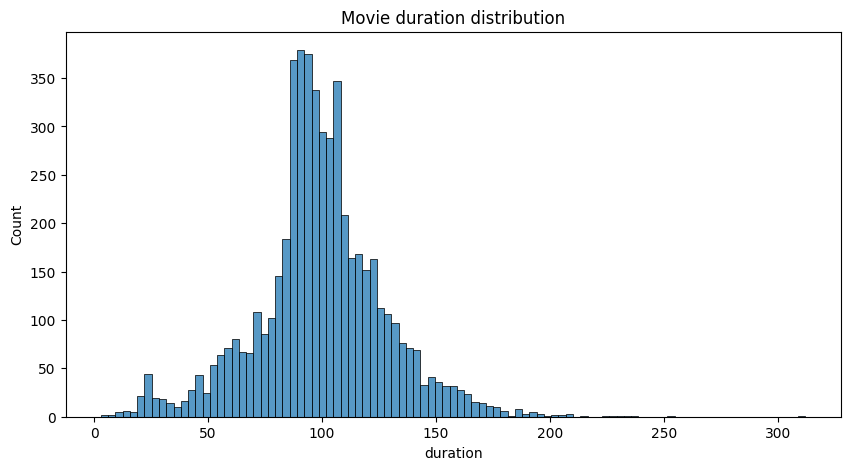

In [41]:
# length of movie analysis
plt.figure(figsize=(10,5))
sns.histplot(x='duration',data=nf_df[nf_df['type']=='Movie'])
plt.title('Movie duration distribution')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [42]:
# Chart - 11 visualization code



# Group by country and count the number of titles
country_counts = nf_df['country'].value_counts().reset_index()
country_counts.columns = ['country', 'count']

# Create a choropleth map with reversed blue color scale
fig = px.choropleth(country_counts,
                    locations='country',
                    locationmode='country names',
                    color='count',
                    title='Content Distribution by Country',
                    labels={'count': 'Number of Titles'},
                    color_continuous_scale='Blues_r')  # Reverse the color scale

# Show the map
fig.show()



##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12 (Popular Words in Descriptions)

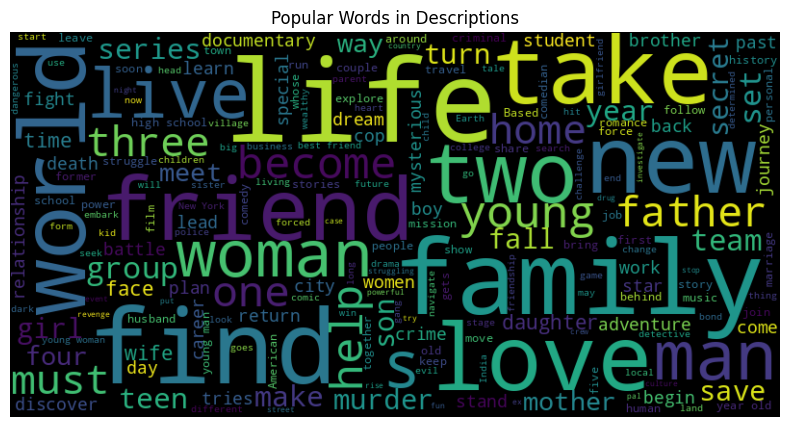

In [43]:
# Chart - 12 visualization code
# Concatenate all the descriptions into a single string
descriptions = ' '.join(nf_df['description'])

# Create a word cloud
wordcloud = WordCloud(width=800, height=400).generate(descriptions)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Popular Words in Descriptions')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13 (Average movie length over the years)

Text(0.5, 0, 'Year')

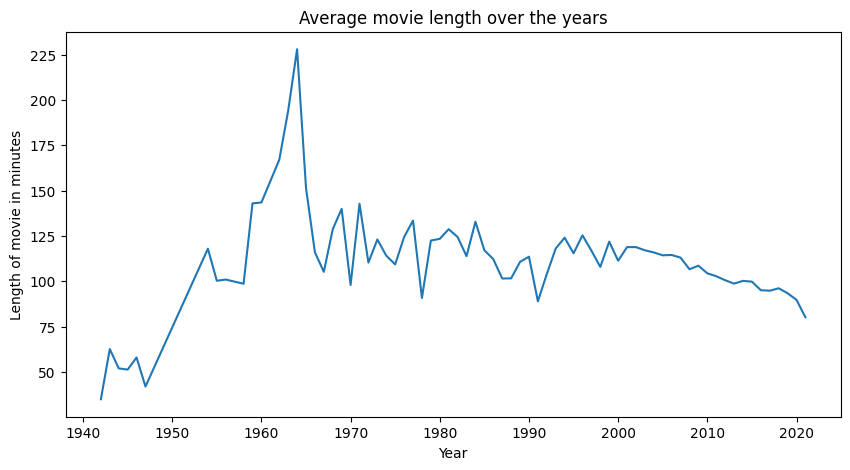

In [44]:
# Chart - 13 visualization code
# Average movie length over the years
plt.figure(figsize=(10,5))
nf_df[nf_df['type']=='Movie'].groupby('release_year')['duration'].mean().plot(kind='line')
plt.title('Average movie length over the years')
plt.ylabel('Length of movie in minutes')
plt.xlabel('Year')


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

**Hypothesis 1:** There is a significant difference in the average duration between movies and TV shows on Netflix.

**Hypothesis 2:** The distribution of genres differs between movies and TV shows on Netflix.

**Hypothesis 3:** There is a relationship between the release year and the number of seasons for TV shows on Netflix.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null hypothesis (H0):** The average duration of movies and TV shows on Netflix is the same.

**Alternative hypothesis (H1):** There is a significant difference in the average duration between movies and TV shows on Netflix.

#### 2. Perform an appropriate statistical test.

In [48]:
# Perform Statistical Test to obtain P-Value
# Filter the dataset for movies and TV shows
movies_duration = nf_df.loc[nf_df['type'] == 'Movie', 'duration']
tv_shows_duration = nf_df.loc[nf_df['type'] == 'TV Show', 'duration']

# Perform independent samples t-test
t_statistic, p_value = stats.ttest_ind(movies_duration, tv_shows_duration, equal_var=False)

# Set the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("P-value :", p_value)
    print("Reject the null hypothesis")
    print("There is a significant difference in the average duration between movies and TV shows on Netflix.")
else:
    print("P-value :", p_value)
    print("Fail to reject the null hypothesis")
    print("There is no significant difference in the average duration between movies and TV shows on Netflix.")


P-value : 0.0
Reject the null hypothesis
There is a significant difference in the average duration between movies and TV shows on Netflix.


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null hypothesis (H0):** The genre distribution between movies and TV shows on Netflix is the same.

**Alternative hypothesis (H1):** The distribution of genres differs between movies and TV shows on Netflix.

#### 2. Perform an appropriate statistical test.

In [46]:
# Perform Statistical Test to obtain P-Value
# Create a contingency table of genre counts by content type (movies vs TV shows)
contingency_table = pd.crosstab(nf_df['type'], nf_df['listed_in'])

# Perform chi-square test of independence
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

# Set the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("P-value :", p_value)
    print("Reject the null hypothesis")
    print("The distribution of genres differs between movies and TV shows on Netflix.")
else:
    print("P-value :", p_value)
    print("Fail to reject the null hypothesis")
    print("The genre distribution between movies and TV shows on Netflix is the same.")

P-value : 0.0
Reject the null hypothesis
The distribution of genres differs between movies and TV shows on Netflix.


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null hypothesis (H0):** There is no relationship between the release year and the number of seasons for TV shows on Netflix.

**Alternative hypothesis (H1):** There is a relationship between the release year and the number of seasons for TV shows on Netflix.

#### 2. Perform an appropriate statistical test.

In [49]:
# Perform Statistical Test to obtain P-Value

# Filter the dataset to include only TV shows
tv_shows_df = nf_df[nf_df['type'] == 'TV Show'].copy()

# Calculate the correlation coefficient between release year and number of seasons
correlation_coef, p_value = stats.pearsonr(tv_shows_df['release_year'], tv_shows_df['duration'])

# Set the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("P-value :", p_value)
    print("Reject the null hypothesis")
    print("There is a relationship between the release year and the number of seasons for TV shows on Netflix.")
else:
    print("P-value :", p_value)
    print("Fail to reject the null hypothesis")
    print("There is no relationship between the release year and the number of seasons for TV shows on Netflix.")


P-value : 5.602422026100708e-05
Reject the null hypothesis
There is a relationship between the release year and the number of seasons for TV shows on Netflix.


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
#Already done
# Assuming 'nf_df' is the DataFrame containing the Netflix dataset

# Fill missing values in 'director' column with 'Unknown'
#nf_df['director'] = nf_df['director'].fillna('Unknown')

# Fill missing values in 'cast' column with 'Unknown'
#nf_df['cast'] = nf_df['cast'].fillna('Unknown')

# Fill missing values in 'country' column with 'Unknown'
#nf_df['country'] = nf_df['country'].fillna('Unknown')

# Fill missing values in 'rating' column with 'mode'
#nf_df['rating'] = nf_df['rating'].fillna(nf_df['rating'].mode()[0])

#nf_df.dropna(axis=0, inplace = True)

# Verify that there are no more missing values
#null_values = nf_df.isnull().sum()
#print(null_values)

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***